In [21]:
!pip install pygad

In [22]:
import pygad
import numpy as np

## Binario

In [ ]:
# Temos uma restrição de 15kilos, para levar o maior numero de itens possiveis e priorizar os mais importantes.add()
# Item | Pontos | Peso
itens = [
    ("canivete",10,1),
    ("feijão",20,5),
    ("batatas",15, 10),
    ("lanterna",2,1),
    ("saco de dormir", 30, 7),
    ("corda",10,5),
    ("bussula",30,1)
    ]
limite_peso = 15

def fintness_func(ga_instance,solution,solution_idx):
  pontos = 0
  peso = 0
  for i in range(len(solution)):
    if solution[i] == 1:
      pontos += itens[i][1]
      peso += itens[i][2]
  if peso > limite_peso:
    return -1
  return pontos


ga_instance = pygad.GA(
    num_generations=500,
    num_parents_mating=5,
    fitness_func=fintness_func,
    sol_per_pop=50,
    num_genes=len(itens),
    gene_type=int,
    init_range_low=0,
    init_range_high=2,
    mutation_type=None
)

ga_instance.run()
solution, solution_fitness, _ = ga_instance.best_solution()
print("Melhor solução", solution)
print("Pontos: ", solution_fitness)
#1 1 0 0 1 0 1

Melhor solução [0 1 0 1 1 0 1]
Pontos:  82


## Valor Real

In [24]:
#  2 * x + 5 = 20
def equation_func(solution):
  x = solution[0]
  equation_output = 2 * x + 5
  target_output = 20
  fitness = 1.0 / np.abs(equation_output - target_output  + 1e-8)
  return fitness

lista = [-10,-5,0,5,7.5, 10, 11]
for value in lista:
  result = equation_func([value])
  print(result)

0.028571428579591836
0.040000000016
0.06666666671111111
0.2000000004
100000000.0
0.1999999996
0.14285714265306124


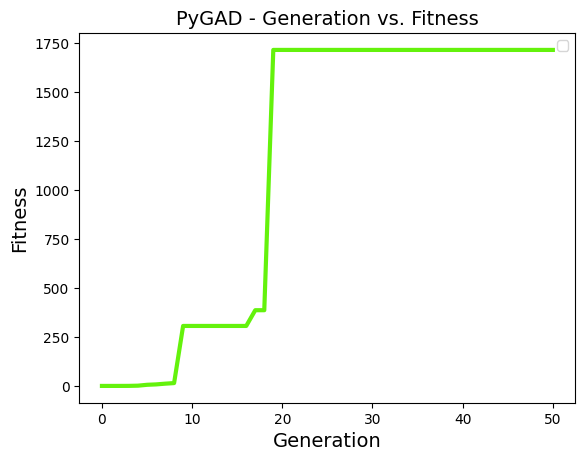

Melhor solução:  7.5
Pontos:  1714.1817753385965


In [25]:
def equation_func(ga_instance,solution,solution_idx):
  x = solution[0]
  equation_output = 2 * x + 5
  target_output = 20
  fitness = 1.0 / np.abs(equation_output - target_output  + 1e-8)
  return fitness

ga_instance = pygad.GA(
    num_generations=50,
    num_parents_mating=10,
    fitness_func=equation_func,
    sol_per_pop = 20,
    num_genes=1,
    gene_type=float,
    init_range_low = -10,
    init_range_high=10
)

ga_instance.run()
#ga_instance.plot_result()
ga_instance.plot_fitness()
solution, solution_fitness, _ = ga_instance.best_solution()
print("Melhor solução: ", round(solution[0],1))
print("Pontos: ", solution_fitness)